# Complementary Macroeconomics

# Fifth Session

# Time Series Analysis (Part 1)

# Stationarity of Time Series Data

In [12]:
from fredapi import Fred

fred_function = Fred(api_key = 'my key')

In [14]:
import matplotlib.pyplot as plt

## Data retrieval via fredapi without setting a variable

In [16]:
fred_function.get_series("FPCPITOTLZGITA", '1960-01-01', '2024-01-01')

1960-01-01    2.350161
1961-01-01    2.050697
1962-01-01    4.691144
1963-01-01    7.454718
1964-01-01    5.912323
                ...   
2020-01-01   -0.137708
2021-01-01    1.873783
2022-01-01    8.201290
2023-01-01    5.622194
2024-01-01    0.982373
Length: 65, dtype: float64

In [20]:
type(fred_function.get_series("FPCPITOTLZGITA", '1960-01-01', '2024-01-01'))

pandas.core.series.Series

### Since the data is a **Series**, we can visualize it directly. The ability to plot is **not dependent on how we define the variable**, but rather on the fact that Python recognizes it as a **pandas Series object**, which supports plotting operations.

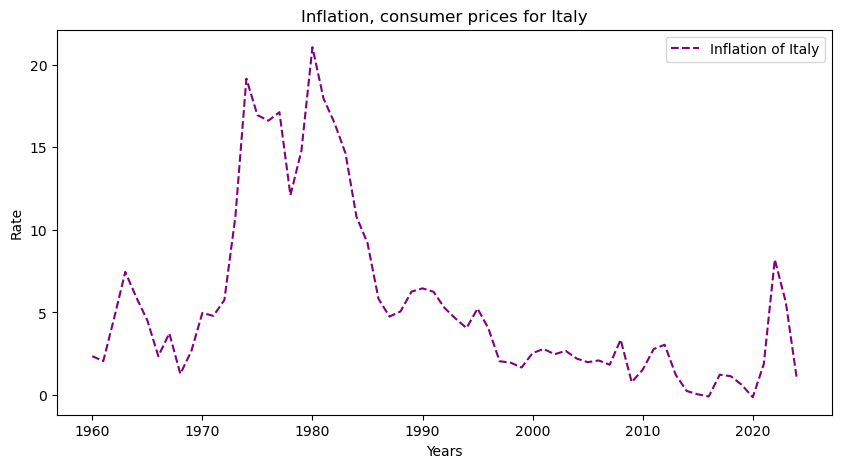

In [30]:
plt.figure(figsize = (10, 5))
plt.plot(fred_function.get_series("FPCPITOTLZGITA", '1960-01-01', '2024-01-01'), label = "Inflation of Italy", color = "purple", linestyle ="--")
plt.title("Inflation, consumer prices for Italy")
plt.xlabel("Years")
plt.ylabel("Rate")
plt.legend()
plt.show()

## Running Regression Between The Rates and Time

### $ \text{inflation rate}_t = \beta_0 + \beta_1(time_t) + \epsilon_t$

In this regression, we model inflation rates as a function of time to analyze **trend effects**. The key focus here is not on estimating precise coefficients but rather on examining **the behavior of residuals**.

This leads to the discussion of **stationarity and white noise**, which are essential concepts in time series analysis. By identifying non-white noise residuals, we can explore techniques to transform the data into a stationary process for better forecasting and economic analysis.


#### For running the regresstion we use statsmodels library

run pip install statsmodels

In [41]:
import statsmodels.api as sm
import numpy as np

## 1st Python Lesson of this session:
### Using np.arange()

In [45]:
example = np.arange(5)
example

array([0, 1, 2, 3, 4])

In [49]:
range1 = 10
example2 = np.arange(range1)
example2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
list_example = [1, 2, 5, "a", 'today', "may", (1, 2, 3), [1, 2, 3]]
len(list_example)

8

In [55]:
np.arange(len(list_example))

array([0, 1, 2, 3, 4, 5, 6, 7])

## Running the Regression

To perform the regression, I first define a variable for inflation data and then use `np.arange()` to generate a corresponding **time variable**. This time series allows us to analyze trends and assess stationarity in the residuals.

In [57]:
italy_inflation_rate = fred_function.get_series("FPCPITOTLZGITA", '1960-01-01', '2024-01-01')

In [59]:
time1 = np.arange(len(italy_inflation_rate))
time1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

## The Role of an Intercept in OLS Regression

In **Ordinary Least Squares (OLS)** regression, including an **intercept term** is crucial to satisfy key assumptions:

- **Ensures the expected value of residuals is zero:**  
  
 $ E[\epsilon_t] = 0$

  Without an intercept, the regression line is forced through the origin, potentially biasing the model and violating this condition.

- **Improves coefficient estimation:**  
  The intercept accounts for any baseline level of the dependent variable when independent variables are zero, leading to more accurate parameter estimates.

- **Minimizes systematic error:**  
  Including an intercept ensures residuals are centered around zero, reducing error accumulation in the model.

However, to illustrate how omitting the intercept **affects the results**, I consider both cases—one **with** an intercept and one **without**. This allows us to observe how the absence of an intercept influences coefficient estimates.


In [69]:
y = italy_inflation_rate.values

In [71]:
sm.OLS(y, time1)

In [73]:
type(sm.OLS(y, time1))

statsmodels.regression.linear_model.OLS

In [75]:
sm.OLS(y, time1).fit()

In [228]:
sm.OLS(y, time1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.215
Model:                            OLS   Adj. R-squared (uncentered):              0.203
Method:                 Least Squares   F-statistic:                              17.53
Date:                Thu, 15 May 2025   Prob (F-statistic):                    8.80e-05
Time:                        03:41:13   Log-Likelihood:                         -217.56
No. Observations:                  65   AIC:                                      437.1
Df Residuals:                      64   BIC:                                      439.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0970      0.023      4.187      0.000       0.051       0.143
==============================================================================
Omnibus:                        9.254   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.690
Skew:                           0.945   Prob(JB):                      0.00787
Kurtosis:                       3.059   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Including Intercept

In [265]:
X = sm.add_constant(time1) 
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     16.61
Date:                Thu, 15 May 2025   Prob (F-statistic):           0.000131
Time:                        04:03:32   Log-Likelihood:                -193.82
No. Observations:                  65   AIC:                             391.6
Df Residuals:                      63   BIC:                             396.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7897      1.189      8.235      0.0

## Scatter Plot

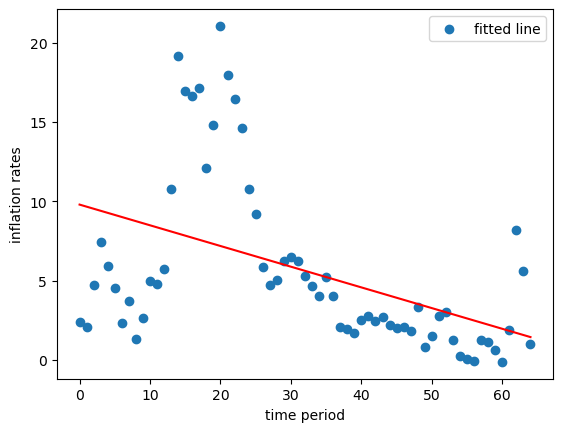

In [268]:
yhat = result.predict(X)
plt.scatter(time1, y, label = "fitted line")
plt.plot(time1, yhat, color = 'red')
plt.xlabel("time period")
plt.ylabel("inflation rates")
plt.legend()
plt.show()

## Residuals Plot

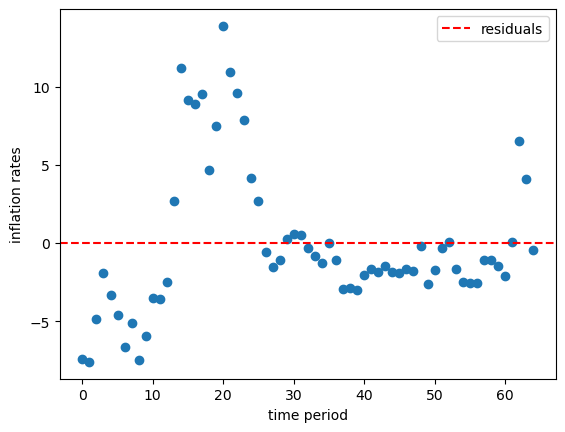

In [272]:
resids = y - yhat

plt.plot(time1, resids, marker = 'o', ls = 'None')
plt.axhline(0, color = 'red', linestyle = '--', label = "residuals")
plt.xlabel("time period")
plt.ylabel("inflation rates")
plt.legend()
plt.show()

## Interpreting the Residual Plot

The residual plot reveals noticeable patterns, indicating that some **information was not fully captured** by the regression model. This suggests the possible presence of **omitted variables**, which can affect the accuracy of the model.


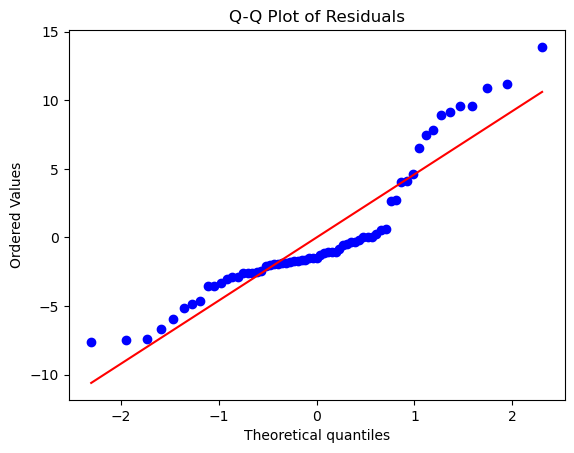

In [261]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(resids, dist="norm", plot=plt)

plt.title("Q-Q Plot of Residuals")
plt.show()


## Insights from the Q-Q Plot

From the **Q-Q plot**, we observe that the residuals **do not align with the reference line**, meaning they **deviate from normality**. This violation of the **normality assumption of residuals** can impact the effectiveness of statistical inference and forecasting.

## 2nd Python Lesson of This Session:
### Defining Time Variable Using Data Index for Regression


In [107]:
#italy_inflation_rate.index

In [115]:
time2 = italy_inflation_rate.index.year
time2

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024],
      dtype='int32')

### adding intercept

In [119]:
X1 = sm.add_constant(time2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     16.61
Date:                Thu, 15 May 2025   Prob (F-statistic):           0.000131
Time:                        04:01:29   Log-Likelihood:                -193.82
No. Observations:                  65   AIC:                             391.6
Df Residuals:                      63   BIC:                             396.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.8237     63.841      4.164      0.0

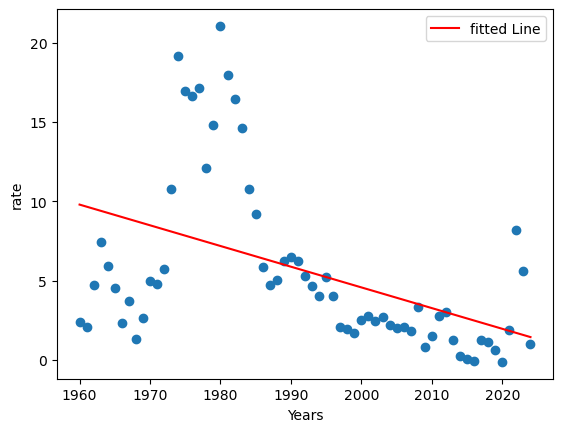

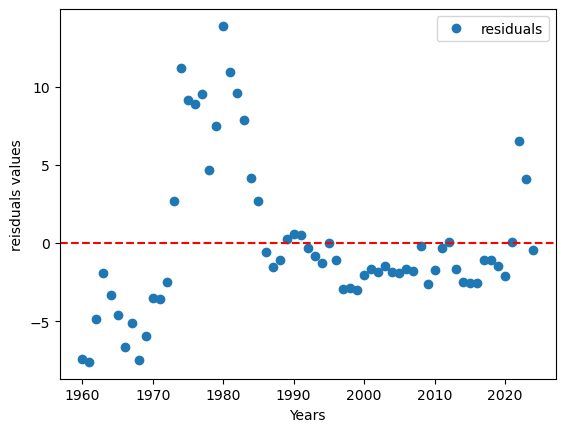

In [259]:
model = sm.OLS(y, X1)
result = model.fit()
print(result.summary())

yhat = result.predict(X1)
plt.scatter(time2, y)
plt.plot(time2, yhat, color = 'red', label = "fitted Line")
plt.xlabel("Years")
plt.ylabel("rate")
plt.legend()
plt.show()

resids = y - yhat

plt.plot(time2, resids, marker = 'o', ls = 'None', label = "residuals") #linestyle = ls
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel("Years")
plt.ylabel("reisduals values")
plt.legend()
plt.show()

## Noise vs. Information Patterns

An essential consideration in time series analysis is **distinguishing noise from structured patterns**. If residuals contain identifiable **trends or systematic behaviors**, they may signal the presence of underlying **informational patterns** rather than pure random fluctuations.

## 3rd Python Lesson of This Session:
### Generating Random numbers

In [249]:
#help(np.random.normal) #first arg is mean, second arg is variance, and the third arg is size

In [139]:
np.random.normal(5, 8)

18.646032073672714

In [147]:
np.random.normal(5, 8, 5)

array([ 5.23741318, 15.0235271 , 10.85905873, 10.83288721, 11.29587418])

In [155]:
np.random.normal(5, 8, (3, 3))

array([[-5.3404584 ,  0.71576302, -0.74275263],
       [14.34631158,  9.74593646,  8.94417619],
       [ 4.30721951, -2.69358962,  4.26890403]])

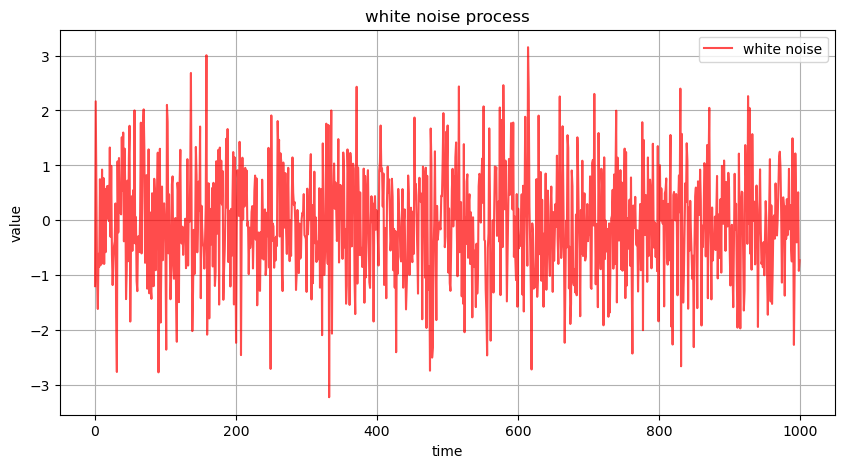

In [167]:
n = 1000
mean = 0
standard_deviation = 1

white_noise = np.random.normal(mean, standard_deviation, n)

plt.figure(figsize = (10, 5))
plt.plot(white_noise, label = 'white noise', color = "red", alpha = 0.7)
plt.title("white noise process")
plt.xlabel("time")
plt.ylabel("value")
plt.legend()
plt.grid()
plt.show()

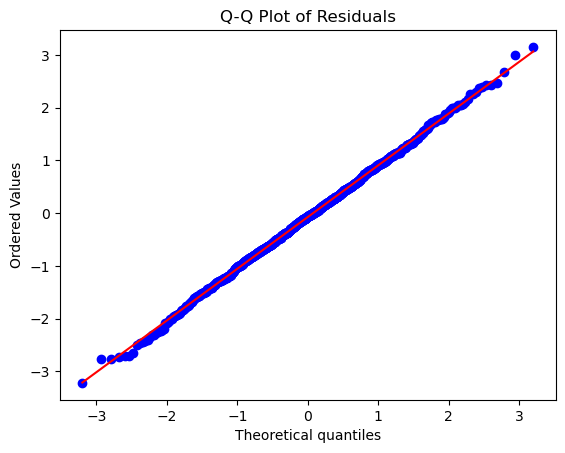

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(white_noise, dist="norm", plot=plt)

plt.title("Q-Q Plot of White Noise")
plt.show()


# What is a stationary series?

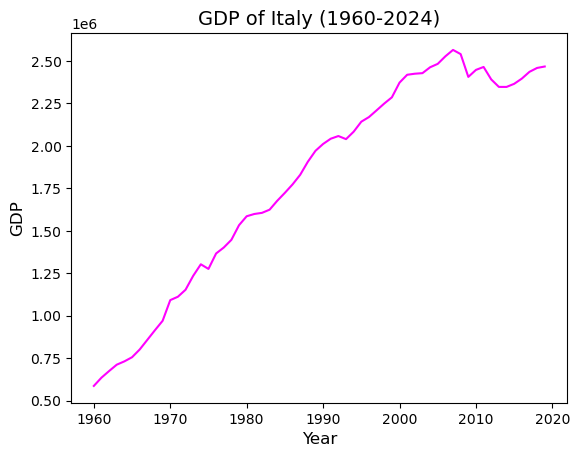

In [284]:
start_date = '1960-01-01'
end_date = '2024-01-01'

italy_gdp = fred_function.get_series("RGDPNAITA666NRUG", start_date, end_date)

plt.plot(italy_gdp, color='magenta')
plt.title('GDP of Italy (1960-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.show()

A **stationary time series** is one whose **statistical properties remain stable over time**. This means its fundamental moments—such as mean, variance, and higher-order moments—do not change with time.

### **Types of Stationarity**
1. **Weakly Stationary (Second-order Stationarity):**  
   A time series is **weakly stationary** if:
   - The **mean** (first moment) remains constant over time:  
     

$E[X_t] = \mu, \quad \forall t$


   - The **variance** (second moment) remains constant:  
     

$Var(X_t) = \sigma^2, \quad \forall t$


   - The **autocovariance** between any two time points depends only on their lag, not their absolute position in time:  
     

$ Cov(X_t, X_{t+h}) = \gamma(h)$



2. **Strictly Stationary (Strong Stationarity):**  
   A time series is **strictly stationary** if its **joint distribution** remains unchanged under time shifts. This means all moments (not just mean and variance) are invariant with respect to time.

### **Why is Stationarity Important?**
Stationarity is a **key assumption** in many time series models, including **ARMA, ARIMA, and VAR models**, as it ensures that the properties of the series are predictable and do not drift over time.

If a time series is **non-stationary**, techniques such as **differencing, detrending, or applying transformations** (e.g., logarithm or Box-Cox) can be used to **convert it into a stationary series** for analysis.

### Taking Logarithm of GDP data

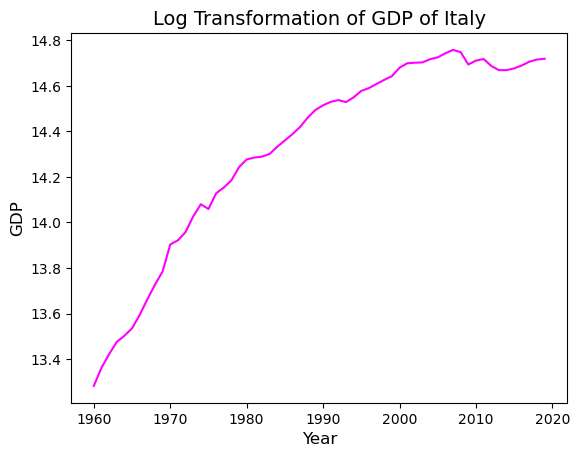

In [286]:
log_italy_gdp = np.log(italy_gdp)

plt.plot(log_italy_gdp, color='magenta')
plt.title('Log Transformation of GDP of Italy', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.show()

## Understanding Differencing in Time Series

When dealing with time series data, sometimes we run into **non-stationarity**, meaning the statistical properties change over time. One simple trick to make a series stationary is **differencing**—which is basically subtracting consecutive values to remove trends.

### **What is Differencing?**
Differencing helps stabilize the mean of a time series by removing changes over time. Think of it like looking at **changes** rather than absolute values. If a stock price moves from **100 to 105** in one day, the change is **5**—that’s differencing in action.

Mathematically, it's expressed as:

$X_t' = X_t - X_{t-1}$

Where $X_t$ is the differenced series, and $X_t\$ is the original time series.

### **Example: Applying First-Order Differencing**
Consider this simple dataset:

**Original Series:**

$X = [10, 12, 15, 18, 22]$



Applying first-order differencing:

$X' = [12 - 10, 15 - 12, 18 - 15, 22 - 18]$

Resulting in:

$X' = [2, 3, 3, 4]$

If the trend still persists, we might need **second-order differencing**, meaning we apply the same transformation again:

$X'' = [3 - 2, 3 - 3, 4 - 3] = [1, 0, 1]$


### **Why is Differencing Important?**
- **Removes trends** so the series can be modeled effectively.
- **Helps satisfy stationarity conditions**, which are crucial for models like ARIMA


## Applying differencing to GDP data

### .diff() method

In [193]:
diff_log_gdp = log_italy_gdp.diff()
diff_log_gdp.head()

1960-01-01         NaN
1961-01-01    0.079830
1962-01-01    0.059571
1963-01-01    0.053940
1964-01-01    0.027029
dtype: float64

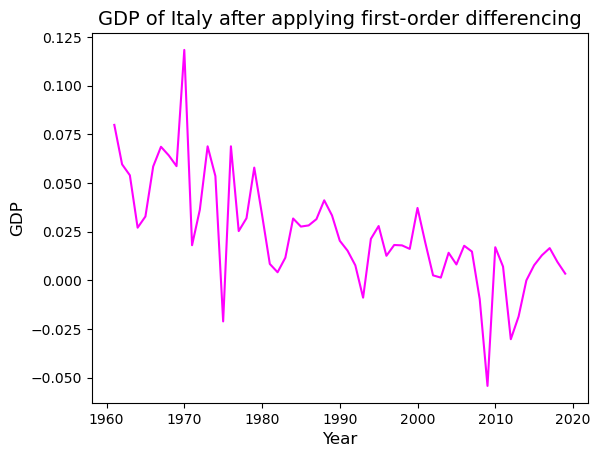

In [307]:
diff_log_gdp_italy = log_italy_gdp.diff().dropna()

plt.plot(diff_log_gdp_italy, color = 'magenta')
plt.title('GDP of Italy after applying first-order differencing', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.show()

### Some trends still persist, but instead of applying second-order differencing immediately, it's **good practice to first assess stationarity** using the **Augmented Dickey-Fuller test**. This helps determine whether the series already meets stationarity conditions or if further transformations are needed.

## 4th Python Lesson of This Session:
### adfuller() or augmented dickey-fuller test

### Hypotheses in ADF Test
Null Hypothesis $(𝐻_0)$: The time series has a unit root → Non-stationary

Alternative Hypothesis $(𝐻_1)$: The time series does not have a unit root → Stationary

If the p-value is below a chosen

In [201]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(diff_log_gdp_italy)
print("adf_statistic", adf_result[0])
print("p_value", adf_result[1])


adf_statistic -1.3447438852209188
p_value 0.6084616267809805


#### ADF test results indicate that the p-value is 0.608, which is much greater than typical significance levels (e.g., 0.05 or 0.01). This suggests that we fail to reject the null hypothesis, meaning the time series likely has a unit root and is non-stationary.

## applying second-order differencing

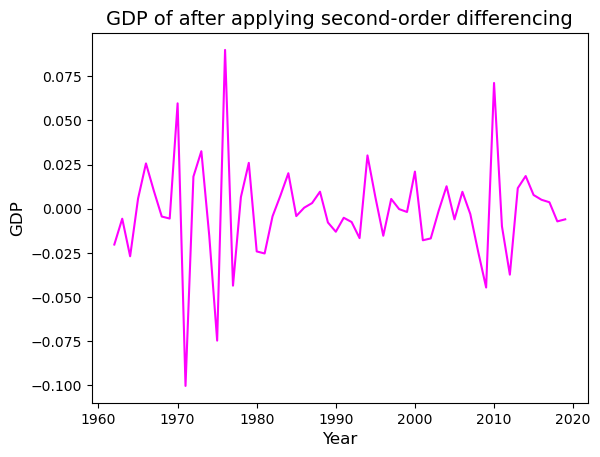

In [309]:
diff_diff_log_gdp_italy = diff_log_gdp_italy.diff().dropna()

plt.plot(diff_diff_log_gdp_italy, color = 'magenta')
plt.title('GDP of after applying second-order differencing', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.show()

In [209]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(diff_diff_log_gdp_italy)
print("adf_statistic", adf_result[0])
print("p_value", adf_result[1])

adf_statistic -4.403617008809066
p_value 0.00029248795763455577


### Since the p-value is extremely small, the presence of a unit root is highly unlikely after applying second-order differencing.

# Exercise: Stationarity in Time Series

Choose **three** time series from the **FRED Database** for any country or state. 

1. **Visualize** the series using plots to identify trends or patterns.
2. **Apply the Augmented Dickey-Fuller (ADF) test** to determine whether the series is stationary.
3. **If non-stationary**, apply **log transformation** and **differencing techniques** to make them stationary.
4. **Discuss findings**—how did the transformations impact stationarity?